In [10]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('Fraud.csv')
m = len(pd.unique(df['nameOrig']))
n = len(pd.unique(df['nameDest']))
print(m)
print(n)

# df

df.drop(["step"], axis=1, inplace=True)
df.drop(["nameOrig"], axis=1, inplace=True)
df.drop(["nameDest"], axis=1, inplace=True)
df

1048317
449635


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
1048570,CASH_OUT,132557.35,479803.00,347245.65,484329.37,616886.72,0,0
1048571,PAYMENT,9917.36,90545.00,80627.64,0.00,0.00,0,0
1048572,PAYMENT,14140.05,20545.00,6404.95,0.00,0.00,0,0
1048573,PAYMENT,10020.05,90605.00,80584.95,0.00,0.00,0,0


# EDA and Preprocessing

Note that there are 1,048,317 distinct entries for the *nameOrig* column, which means that almost all original customers are distinct. Therefore, *nameOrig* will not be an important feature for modeling.

Note that there are 449,635 distinct entries for the *nameDest* column. which means there are many customers that are receiving multiple transactions. Having quickly skimmed a few thousand columns, it does not appear that any receiving customer stands out in committing fraud. Furthermore, given that there are a still 449,635 entries of distinct customers receiving money, encoding these as categorical variables does not seem to make much sense (usually categorical variables do not have this many categories). Hence, *nameDest* will not be an important feature for modeling.

Lastly, the *step* column has also been dropped. While it is possible that certain hours of real world time may have more fraud occurrences - for example, it could be that fraud occurs more often during the night than during the day - it does not intuitively appear to be an important predictor.

In [3]:
df.isnull().sum()

# There appear to be no missing values in the dataset

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:>

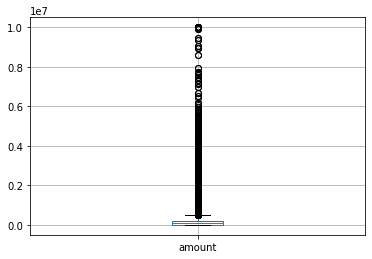

In [4]:
pd.DataFrame(df['amount']).boxplot()

# NOTE: These plots are only to see the skewness of the columns in order to transform data

<AxesSubplot:>

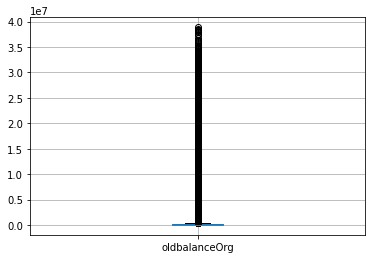

In [5]:
pd.DataFrame(df['oldbalanceOrg']).boxplot()

<AxesSubplot:>

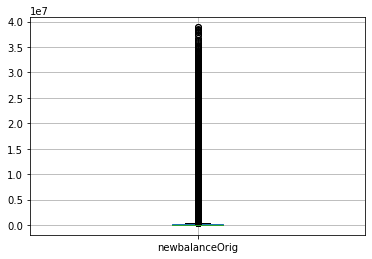

In [6]:
pd.DataFrame(df['newbalanceOrig']).boxplot()

<AxesSubplot:>

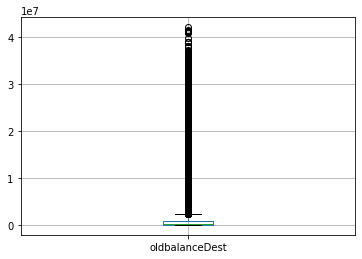

In [7]:
pd.DataFrame(df['oldbalanceDest']).boxplot()

<AxesSubplot:>

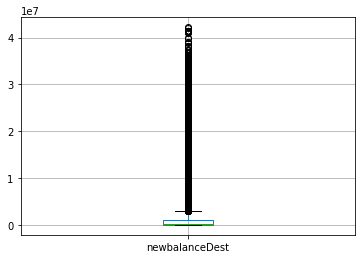

In [8]:
pd.DataFrame(df['newbalanceDest']).boxplot()

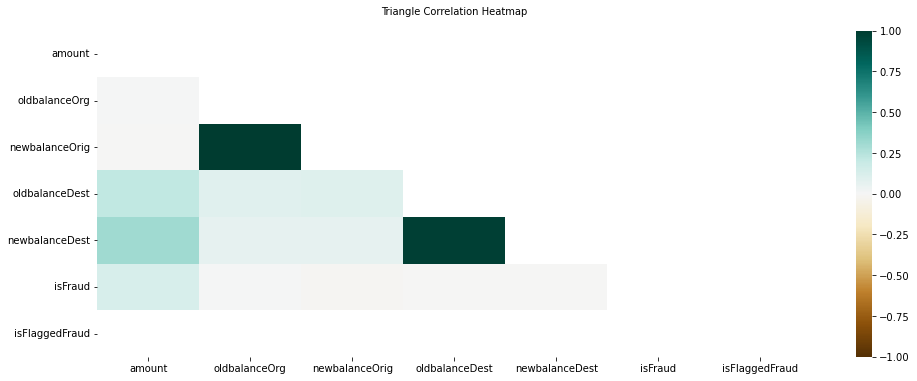

In [9]:
## Triangle Correlation Matrix

plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':10}, pad=16);

# Multicollinearity

There is clear multicollinearity between *newbalanceOrig* and *oldbalanceOrg*, *newbalanceDest* and *oldbalanceDest*. There is also a fair bit of collinearity between *amount* and *newbalanceDest*. The collinearity occurs because there is a link between most of these variables, i.e. theoretically, *amount* = *oldbalanceOrg* - *newbalanceOrig*, unless the amount exceeds the *oldbalanceOrg*, in which case the account of the sender should drain to 0 (some cases are exceptions).

Similarly, theoretically, *amount* = *newbalanceDest* - *oldbalanceDest* = *oldbalanceOrg* - *newbalanceOrig*, as that is the amount of money transferred over to the new account. Note that this is also not perfect; there are cases which do not follow this.

I have not been able to finish the assignment for the internship position due to other commitments; I was not able to transform the data and run a IsolationForest regressor which would be the most adequate for this dataset; the IsolationForest algorithm is a tree-based method that calculates the anomaly score (in this case it is the occurrence of fraud.

The IsolationForest essentially ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. I would've run it with *type*, *amount* and one of the two collinear variable pairs above (remove one from each gets rid of collinearity). The fraud occurrences appear to be when the account of the sender has a positive quantity and the values of *amount* matches this, causing the account to drain exactly to 0 (generally). However, this does not mean that if the account is drained exactly to 0, then fraud has occured. Should the company update its infrastructure, there should not be a huge issue in how the fraud prediction changes as IsolationForest is quite a scalable method. We can test that the changes that are to be made by training on the dataset and observing the new *isFlaggedFraud* values and compare against the *isFraud* to determine how effective the method is. Although I haven't formally carried this out, I believe the *amount* will be the most important covariate out of all the covariates presented.

Despite the deadline having passed, I will work on this dataset and explore further for my own curiosity.